# **XCS224W - Colab 0**

[![Open In Colab](https://colab.research.google.com/assets/colab-badge.svg)](https://colab.research.google.com/github/scpd-proed/XCS224W-Colab0/blob/main/Notebook/XCS224W_Colab0.ipynb)

Before opening the colab with the badge, you would need to allow Google Colab to access the GitHub private repositories. Please check therefore [this tutorial](https://colab.research.google.com/github/googlecolab/colabtools/blob/master/notebooks/colab-github-demo.ipynb#:~:text=Navigate%20to%20http%3A%2F%2Fcolab,to%20read%20the%20private%20files.).

If colab is opened with this badge, make sure please **save copy to drive** in 'File' menu before running the notebook.

Colab 0 **will not be graded**, so you don't need to hand in this notebook. That said, we highly recommend that you work through this notebook, so you can get familiar with the basic concepts of graph mining and Graph Neural Networks.

In this Colab, we will introduce two packages, [NetworkX](https://networkx.org/documentation/stable/) and [PyTorch Geometric](https://pytorch-geometric.readthedocs.io/en/latest/).

For the PyTorch Geometric section, you don't need to understand all of the details yet. Concepts and implementations of graph neural network will be covered in future lectures and Colabs.


# NetworkX Tutorial

NetworkX is one of the most frequently used Python packages to create, manipulate, and mine graphs.

The main parts of this tutorial are adapted from https://colab.research.google.com/github/jdwittenauer/ipython-notebooks/blob/master/notebooks/libraries/NetworkX.ipynb#scrollTo=zA1OO6huHeV6

## Setup

In [2]:
# Import the NetworkX package
import networkx as nx

## Graph
NetworkX provides several classes to store different types of graphs, such as directed and undirected graphs. It also provides classes to create multigraphs (both directed and undirected).

For more information, please refer to [NetworkX graph types](https://networkx.org/documentation/stable/reference/classes/index.html).

In [3]:
# Create an undirected graph G
G = nx.Graph()
print(G.is_directed())

# Create a directed graph H
H = nx.DiGraph()
print(H.is_directed())

# Add graph level attribute
G.graph["Name"] = "Bar"
print(G.graph)

False
True
{'Name': 'Bar'}


## Node

Nodes (with attributes) can be easily added to NetworkX graphs.

In [4]:
# Add one node with node level attributes
G.add_node(0, feature=0, label=0)

# Get attributes of the node 0
node_0_attr = G.nodes[0]
print("Node 0 has the attributes {}".format(node_0_attr))

Node 0 has the attributes {'feature': 0, 'label': 0}


In [5]:
# Add multiple nodes with attributes
G.add_nodes_from([
  (1, {"feature": 1, "label": 1}),
  (2, {"feature": 2, "label": 2})
])

# Loop through all the nodes
# Set data=True will return node attributes
for node in G.nodes(data=True):
  print(node)

# Get number of nodes
num_nodes = G.number_of_nodes()
print("G has {} nodes".format(num_nodes))

(0, {'feature': 0, 'label': 0})
(1, {'feature': 1, 'label': 1})
(2, {'feature': 2, 'label': 2})
G has 3 nodes


## Edge

Similar to nodes, edges (with attributes) can be easily added to NetworkX graphs.

In [6]:
# Add one edge with edge weight 0.5
G.add_edge(0, 1, weight=0.5)

# Get attributes of the edge (0, 1)
edge_0_1_attr = G.edges[(0, 1)]
print("Edge (0, 1) has the attributes {}".format(edge_0_1_attr))

Edge (0, 1) has the attributes {'weight': 0.5}


In [7]:
# Add multiple edges with edge weights
G.add_edges_from([
  (1, 2, {"weight": 0.3}),
  (2, 0, {"weight": 0.1})
])

# Loop through all the edges
# Here there is no data=True, so only the edge will be returned
for edge in G.edges():
  print(edge)

# Get number of edges
num_edges = G.number_of_edges()
print("G has {} edges".format(num_edges))

(0, 1)
(0, 2)
(1, 2)
G has 3 edges


## Visualization

Matplotlib is building the font cache; this may take a moment.


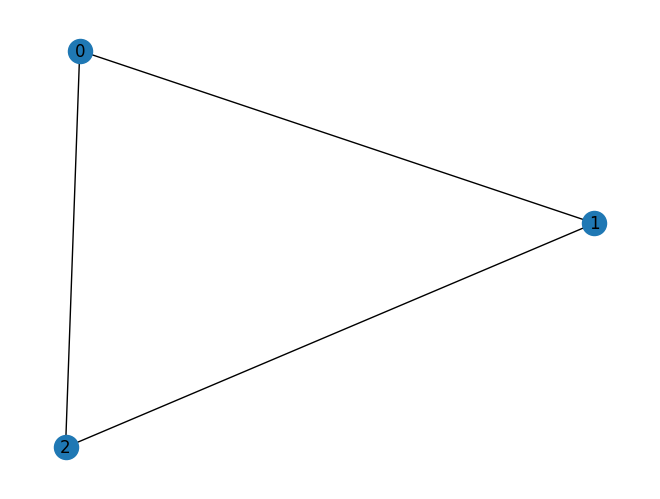

In [8]:
# Draw the graph
nx.draw(G, with_labels = True)

## Node Degree and Neighbors

In [9]:
node_id = 1

# Degree of node 1
print("Node {} has degree {}".format(node_id, G.degree[node_id]))

# Get neighbor of node 1
for neighbor in G.neighbors(node_id):
  print("Node {} has neighbor {}".format(node_id, neighbor))

Node 1 has degree 2
Node 1 has neighbor 0
Node 1 has neighbor 2


## Other Functionalities

NetworkX also provides plenty of useful methods to study graphs.

Here is an example of getting the [PageRank](https://networkx.org/documentation/stable/reference/algorithms/generated/networkx.algorithms.link_analysis.pagerank_alg.pagerank.html#networkx.algorithms.link_analysis.pagerank_alg.pagerank) of nodes (we will introduce PageRank in Module 1: Traditional Methods for ML on Graphs).

{0: 0.17857162031103999,
 1: 0.32142837968896,
 2: 0.32142837968896,
 3: 0.17857162031103999}

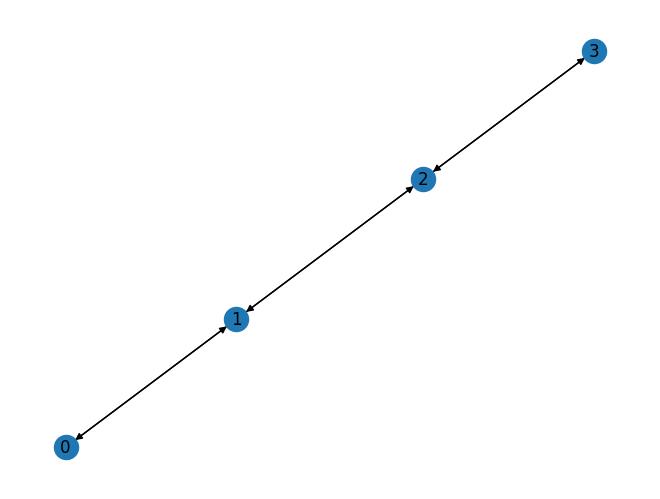

In [10]:
num_nodes = 4
# Create a new path like graph and change it to a directed graph
G = nx.DiGraph(nx.path_graph(num_nodes))
nx.draw(G, with_labels = True)

# Get the PageRank
pr = nx.pagerank(G, alpha=0.8)
pr

## Documentation

You can explore more NetworkX functions through its [documentation](https://networkx.org/documentation/stable/).

# PyTorch Geometric Tutorial
## Introduction

Recently, deep learning on graphs has emerged as one of the hottest research fields in the deep learning community.
**Graph Neural Networks (GNNs)** aim to generalize classical deep learning concepts to structured relational data (distinct from images or texts), enabling neural networks to reason about objects and their relations. This tutorial will introduce you to some fundamental concepts regarding deep learning on graphs via Graph Neural Networks. Don't worry if you don't yet understand some GNN specific concepts such as `GCNConv` -- we will cover this and more, starting with Module 2: Introduction to Graph Neural Networks :). 

We begin by introducing the powerful **[PyTorch Geometric (PyG) library](https://github.com/rusty1s/pytorch_geometric)**.
PyTorch Geometric is an extension to the popular deep learning framework [PyTorch](https://pytorch.org/) and consists of various methods and utilities to ease the implementation of Graph Neural Networks. 

Following [Kipf et al. (2017)](https://arxiv.org/abs/1609.02907), we dive into the world of GNNs by looking at a simple graph-structured example, the well-known [**Zachary's karate club network**](https://en.wikipedia.org/wiki/Zachary%27s_karate_club). This graph describes a social network of 34 members of a karate club where a link exists between members if they have interacted outside the club. For this exploration, we are interested in detecting communities that arise from the member's interaction.

**Note**: This tutorial is adapted from https://colab.research.google.com/drive/1h3-vJGRVloF5zStxL5I0rSy4ZUPNsjy8?usp=sharing#scrollTo=ci-LpZWhRJoI by [Matthias Fey](https://rusty1s.github.io/#/)

### Setup
The installation of PyG on Colab can be a little bit tricky. First let us check which version of PyTorch you are running

In [11]:
import torch
print("PyTorch has version {}".format(torch.__version__))

PyTorch has version 2.4.0


Now, we will download the necessary packages for PyG. Before executing the cell below, make sure that your version of torch matches the output from the cell above. Namely, if the above cell prints "PyTorch has version 2.0.1+cu121", the urls for the installation of **torch-scatter** and **torch-sparse** should include **torch-2.0.1+cu121** -- in case of any issues, more information can be found on the [PyG's installation page](https://pytorch-geometric.readthedocs.io/en/latest/notes/installation.html).

In [12]:
# Install torch geometric
!pip install torch-scatter -f https://pytorch-geometric.com/whl/torch-2.4.0+cu121.html
!pip install torch-sparse -f https://pytorch-geometric.com/whl/torch-2.4.0+cu121.html
!pip install torch-geometric

Looking in links: https://pytorch-geometric.com/whl/torch-2.4.0+cu121.html
Looking in links: https://pytorch-geometric.com/whl/torch-2.4.0+cu121.html


## Visualization Helper Script

In [13]:
# Helper function for visualization.
%matplotlib inline
import torch
import networkx as nx
import matplotlib.pyplot as plt

# Visualization function for NX graph or PyTorch tensor
def visualize(h, color, epoch=None, loss=None):
    plt.figure(figsize=(7,7))
    plt.xticks([])
    plt.yticks([])

    if torch.is_tensor(h):
        h = h.detach().cpu().numpy()
        plt.scatter(h[:, 0], h[:, 1], s=140, c=color, cmap="Set2")
        if epoch is not None and loss is not None:
            plt.xlabel(f'Epoch: {epoch}, Loss: {loss.item():.4f}', fontsize=16)
    else:
        nx.draw_networkx(G, pos=nx.spring_layout(G, seed=42), with_labels=False,
                         node_color=color, cmap="Set2")
    plt.show()

## Dataset

PyTorch Geometric provides easy access to the [**Zachary's karate club network**](https://en.wikipedia.org/wiki/Zachary%27s_karate_club) via the [`torch_geometric.datasets`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets) subpackage:

In [14]:
from torch_geometric.datasets import KarateClub

dataset = KarateClub()
print(f'Dataset: {dataset}:')
print('======================')
print(f'Number of graphs: {len(dataset)}')
print(f'Number of features: {dataset.num_features}')
print(f'Number of classes: {dataset.num_classes}')

Dataset: KarateClub():
Number of graphs: 1
Number of features: 34
Number of classes: 4


After initializing the [`KarateClub`](https://pytorch-geometric.readthedocs.io/en/latest/modules/datasets.html#torch_geometric.datasets.KarateClub) dataset, we first inspect some of its properties.
For example, we see that this dataset holds exactly **one graph** and each node in this dataset is assigned a **34-dimensional feature vector** (which uniquely describes the members of the karate club).
Furthermore, the graph holds exactly **4 classes** that represent the community each node belongs to.

Let's now look at the underlying graph in more detail:

In [15]:
data = dataset[0]  # Get the first graph object.

print(data)
print('==============================================================')

# Gather some statistics about the graph.
print(f'Number of nodes: {data.num_nodes}')
print(f'Number of edges: {data.num_edges}')
print(f'Average node degree: {data.num_edges / data.num_nodes:.2f}')
print(f'Number of training nodes: {data.train_mask.sum()}')
print(f'Training node label rate: {int(data.train_mask.sum()) / data.num_nodes:.2f}')
print(f'Contains isolated nodes: {data.has_isolated_nodes()}')
print(f'Contains self-loops: {data.has_self_loops()}')
print(f'Is undirected: {data.is_undirected()}')

Data(x=[34, 34], edge_index=[2, 156], y=[34], train_mask=[34])
Number of nodes: 34
Number of edges: 156
Average node degree: 4.59
Number of training nodes: 4
Training node label rate: 0.12
Contains isolated nodes: False
Contains self-loops: False
Is undirected: True


## Data Exploration

Each graph in PyTorch Geometric is represented by a single [`Data`](https://pytorch-geometric.readthedocs.io/en/latest/modules/data.html#torch_geometric.data.Data) object, which holds all the information to describe the graph representation.
We can print the data object anytime via `print(data)` to receive a short summary about its attributes and their shapes:
```
Data(edge_index=[2, 156], x=[34, 34], y=[34], train_mask=[34])
```
This graph `data` object holds 4 attributes:
(1) The `edge_index` property holds the information about the **graph's connectivity or edges**, where each edge is represented as a tuple of source and destination node indices. For undirected graphs, each edge is represented twice to capture both edge directions. Hence, our graph has 78 edges; PyG refers to (2) **node features** as the variable `x` (each of the 34 nodes is assigned a 34-dim feature vector) and (3) **node labels** as `y` (each node is assigned to exactly one class); (4) finally, the `train_mask` attribute describes the nodes for which we already know their community assigments.
In total, we are only aware of the ground-truth labels of 4 nodes (one for each community), and our task is to infer the community assignment for the remaining nodes.

The `data` object also provides some **utility functions** to infer some basic properties of the underlying graph.
For example, we can easily infer whether there exists isolated nodes in the graph (*i.e.* there exists no edge to any node), whether the graph contains self-loops (*i.e.*, $(v, v) \in \mathcal{E}$), or whether the graph is undirected (*i.e.*, for each edge $(v, w) \in \mathcal{E}$ there also exists the edge $(w, v) \in \mathcal{E}$).

## Edge Index

By printing `edge_index`, we can further understand how PyG represents graph connectivity internally.

In [16]:
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 300})'''))

edge_index = data.edge_index
print(edge_index.t())

<IPython.core.display.Javascript object>

tensor([[ 0,  1],
        [ 0,  2],
        [ 0,  3],
        [ 0,  4],
        [ 0,  5],
        [ 0,  6],
        [ 0,  7],
        [ 0,  8],
        [ 0, 10],
        [ 0, 11],
        [ 0, 12],
        [ 0, 13],
        [ 0, 17],
        [ 0, 19],
        [ 0, 21],
        [ 0, 31],
        [ 1,  0],
        [ 1,  2],
        [ 1,  3],
        [ 1,  7],
        [ 1, 13],
        [ 1, 17],
        [ 1, 19],
        [ 1, 21],
        [ 1, 30],
        [ 2,  0],
        [ 2,  1],
        [ 2,  3],
        [ 2,  7],
        [ 2,  8],
        [ 2,  9],
        [ 2, 13],
        [ 2, 27],
        [ 2, 28],
        [ 2, 32],
        [ 3,  0],
        [ 3,  1],
        [ 3,  2],
        [ 3,  7],
        [ 3, 12],
        [ 3, 13],
        [ 4,  0],
        [ 4,  6],
        [ 4, 10],
        [ 5,  0],
        [ 5,  6],
        [ 5, 10],
        [ 5, 16],
        [ 6,  0],
        [ 6,  4],
        [ 6,  5],
        [ 6, 16],
        [ 7,  0],
        [ 7,  1],
        [ 7,  2],
        [ 

As described above in **Data Exploration**, for each edge, `edge_index` holds a tuple of two node indices, where the first value describes the node index of the source node and the second value describes the node index of the destination node.

This representation is known as the **COO format (coordinate format)** commonly used for representing sparse matrices.
Instead of holding the adjacency information in a dense representation $\mathbf{A} \in \{ 0, 1 \}^{|\mathcal{V}| \times |\mathcal{V}|}$, PyG represents graphs sparsely, which refers to only holding the coordinates/values for which entries in $\mathbf{A}$ are non-zero.

We can further visualize the graph by converting it to the `networkx` library format. `Networkx` serves not only as a rich tool for graph manipulation, but also as a powerful tool for visualization:

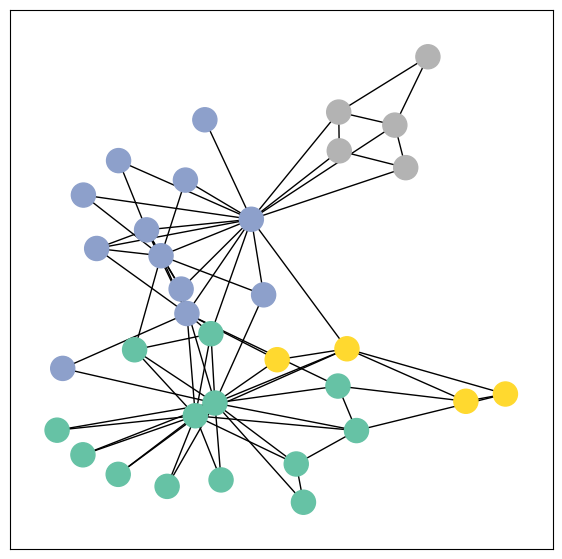

In [17]:
from torch_geometric.utils import to_networkx

G = to_networkx(data, to_undirected=True)
visualize(G, color=data.y)

## Implementing Graph Neural Networks

After learning about PyG's data handling, it's time to implement our first Graph Neural Network!

For this, we will use one of the most simple GNN operators, the **GCN layer** ([Kipf et al. (2017)](https://arxiv.org/abs/1609.02907)).

PyG implements this layer via [`GCNConv`](https://pytorch-geometric.readthedocs.io/en/latest/modules/nn.html#torch_geometric.nn.conv.GCNConv), which can be executed by passing in the node feature representation `x` and the COO graph connectivity representation `edge_index`.

With this, we are ready to create our first Graph Neural Network by defining our network architecture in a `torch.nn.Module` class:

In [18]:
import torch
from torch.nn import Linear
from torch_geometric.nn import GCNConv


class GCN(torch.nn.Module):
    def __init__(self):
        super(GCN, self).__init__()
        torch.manual_seed(12345)
        self.conv1 = GCNConv(dataset.num_features, 4)
        self.conv2 = GCNConv(4, 4)
        self.conv3 = GCNConv(4, 2)
        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv1(x, edge_index)
        h = h.tanh()
        h = self.conv2(h, edge_index)
        h = h.tanh()
        h = self.conv3(h, edge_index)
        h = h.tanh()  # Final GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

model = GCN()
print(model)

GCN(
  (conv1): GCNConv(34, 4)
  (conv2): GCNConv(4, 4)
  (conv3): GCNConv(4, 2)
  (classifier): Linear(in_features=2, out_features=4, bias=True)
)


We first initialize all of the building blocks in `__init__`, and then define the computation flow of our network in `forward`.
Our GNN is defined by stacking **three graph convolution layers**, which corresponds to aggregating 3-hop neighborhood information around each node (all nodes up to 3 "hops" away).
In addition, the `GCNConv` layers reduce the node feature dimensionality to $2$, *i.e.*, $34 \rightarrow 4 \rightarrow 4 \rightarrow 2$. Each `GCNConv` layer is enhanced by a [tanh](https://pytorch.org/docs/stable/generated/torch.nn.Tanh.html?highlight=tanh#torch.nn.Tanh) non-linearity.

After that, we apply a single linear transformation ([`torch.nn.Linear`](https://pytorch.org/docs/stable/generated/torch.nn.Linear.html?highlight=linear#torch.nn.Linear)) that acts as a classifier to map our nodes to 1 out of the 4 classes/communities.

We return both the output of the final classifier as well as the final node embeddings produced by our GNN.
We proceed to initialize our final model via `GCN()`, and printing our model produces a summary of all its used sub-modules.

## Pre-Trained Embeddings

Before training the weights of our model, we can already visualize the embeddings generated by GCN.

Embedding shape: [34, 2]


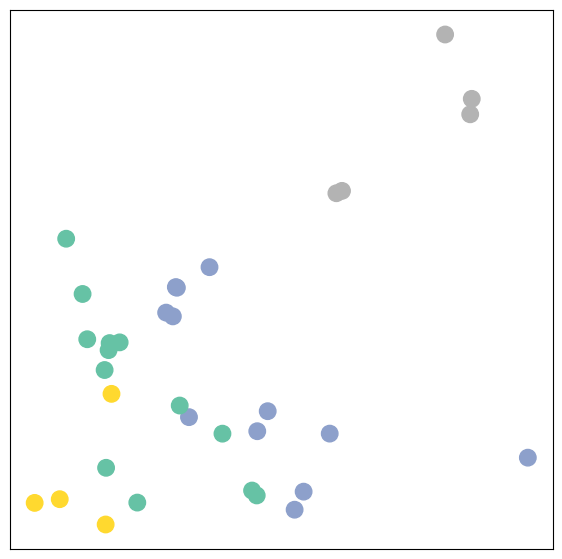

In [19]:
model = GCN()

_, h = model(data.x, data.edge_index)
print(f'Embedding shape: {list(h.shape)}')

visualize(h, color=data.y)

Remarkably, even before training, the model produces an embedding of nodes that closely resembles the community-structure of the graph.
Nodes of the same color (community) are already closely clustered together in the embedding space, although the weights of our model are initialized **completely at random** and we have not yet performed any training!
This leads to the conclusion that GNNs introduce a strong inductive bias based on the graph structure itself, which naturally leads to similar embeddings for near by nodes in the graph.



## Training on the Karate Club Network

Can we do better? Let's look at an example on how to train our network parameters based on the community assignments of the 4 known nodes in the graph (one for each community):

Since everything in our model is differentiable and parameterized, we can add node labels, train the model, and observe how the embeddings react.
Here, we make use of a semi-supervised learning procedure: We train with the supervision of one node per class, but are allowed to make use of the complete input graph data for the generation of node embeddings. Our goal is to then predict the labels of the unknown nodes.

Training our model is very similar to any other PyTorch model.
In addition to defining our network architecture, we define a loss critertion ([`CrossEntropyLoss`](https://pytorch.org/docs/stable/generated/torch.nn.CrossEntropyLoss.html)) and initialize a stochastic gradient optimizer ([`Adam`](https://pytorch.org/docs/stable/optim.html?highlight=adam#torch.optim.Adam)).
After that, we perform multiple rounds of optimization, where each round consists of a forward and backward pass to compute the gradients of our model parameters w.r.t. to the loss derived from the forward pass.
If you are familiar with PyTorch, this scheme should appear very familar to you. 
Otherwise, the PyTorch docs provide [a good introduction on how to train a neural network in PyTorch](https://pytorch.org/tutorials/beginner/blitz/cifar10_tutorial.html#define-a-loss-function-and-optimizer).

Note that our semi-supervised learning scenario is achieved by the following line:
```
loss = criterion(out[data.train_mask], data.y[data.train_mask])
```
While we compute node embeddings for all of our nodes, we **only make use of the training node embeddings for computing the loss**.
This is implemented by filtering the output of the classifier `out` and ground-truth labels `data.y` to only contain the nodes in the `train_mask`.

Let us now start training and see how our node embeddings evolve over time (best experienced by explicitely running the code):

<IPython.core.display.Javascript object>

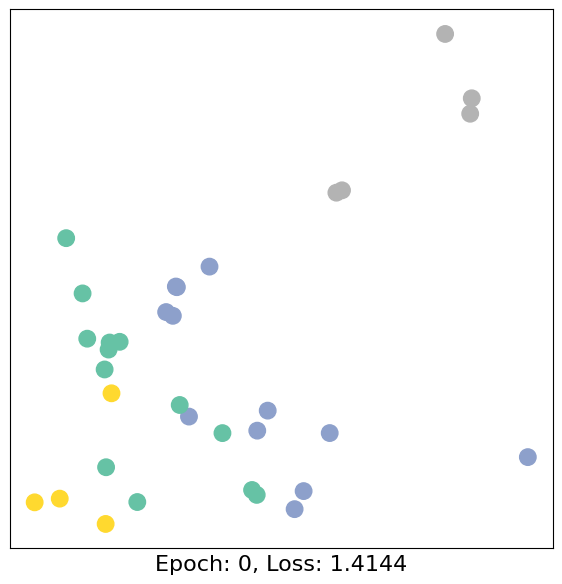

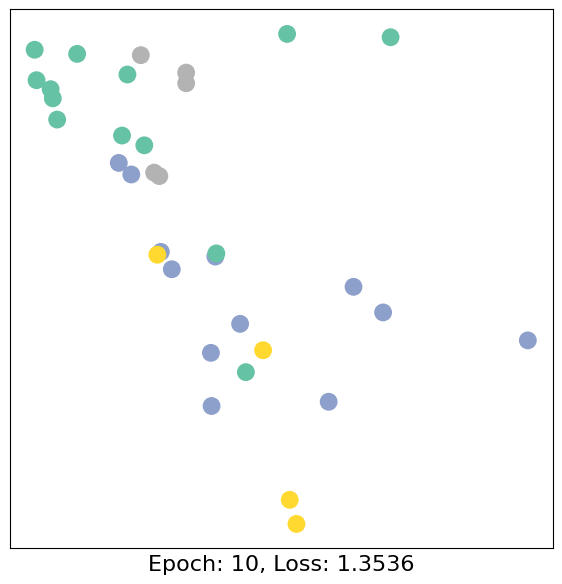

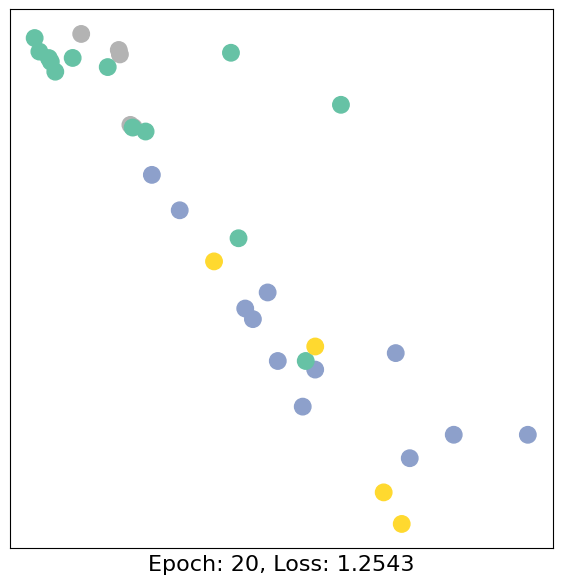

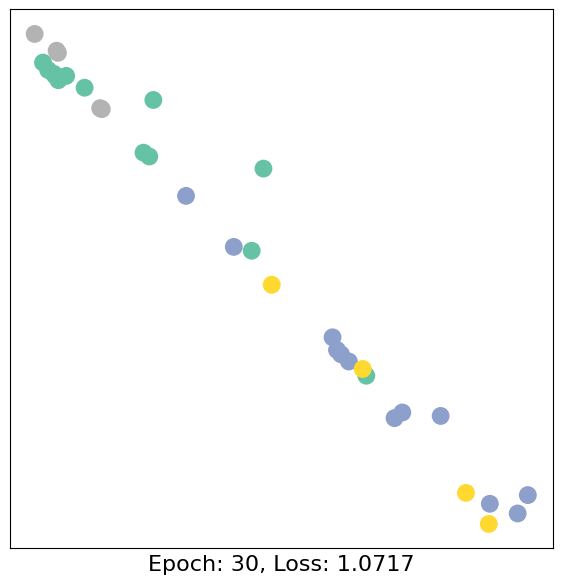

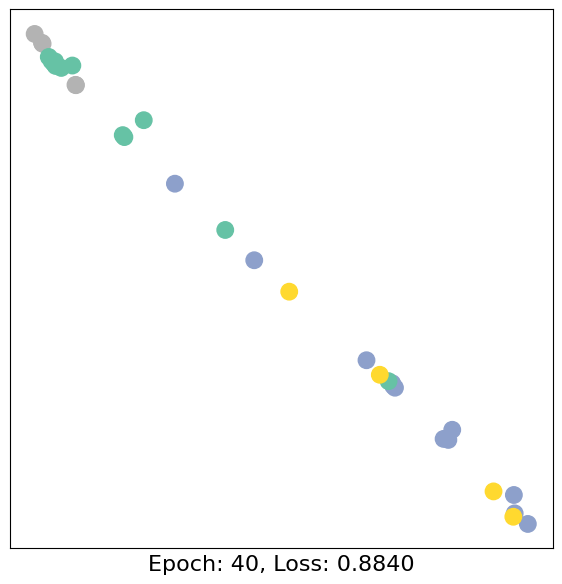

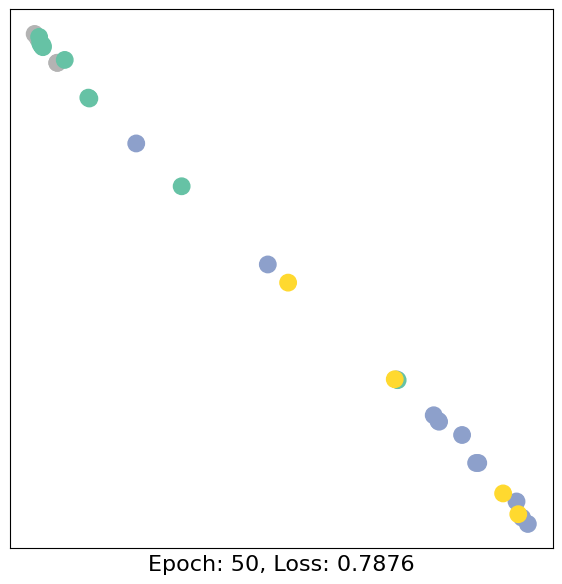

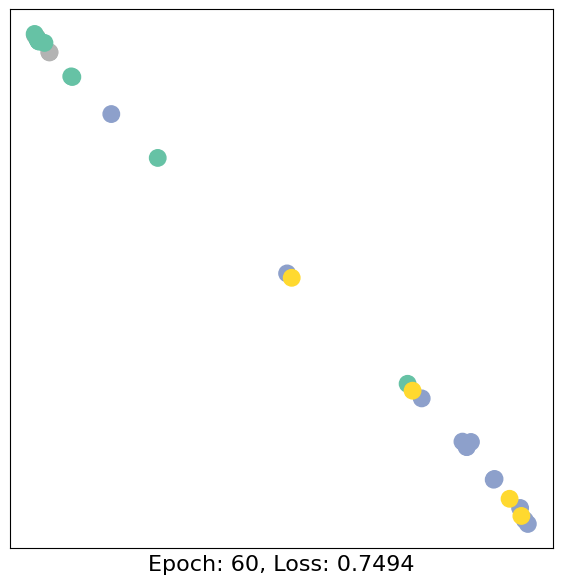

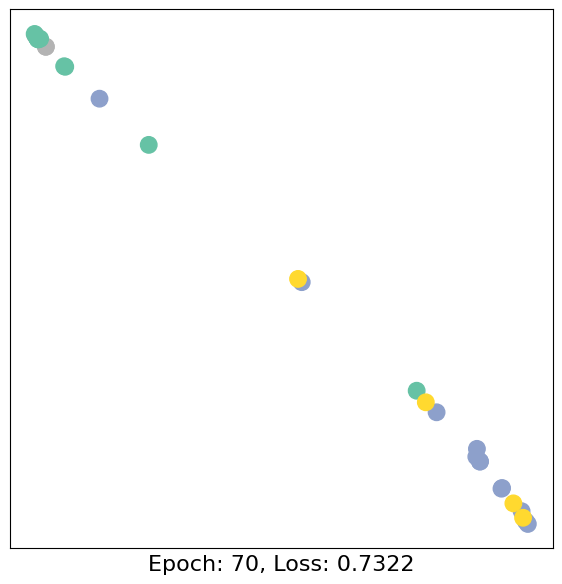

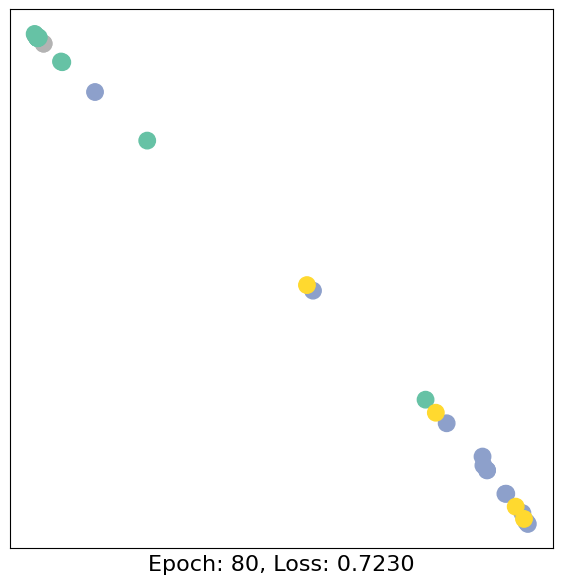

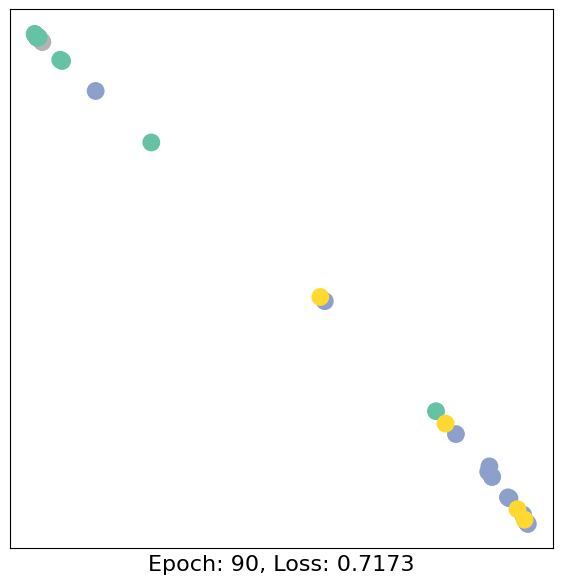

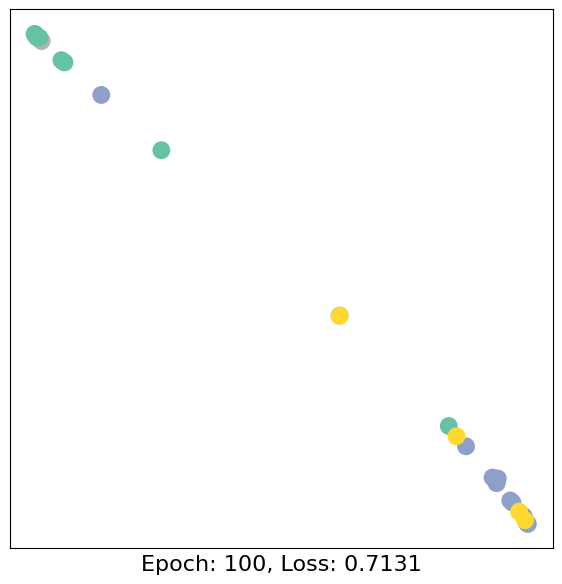

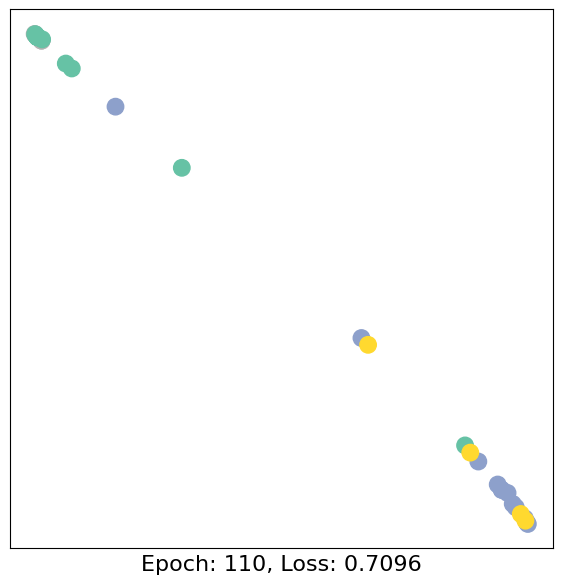

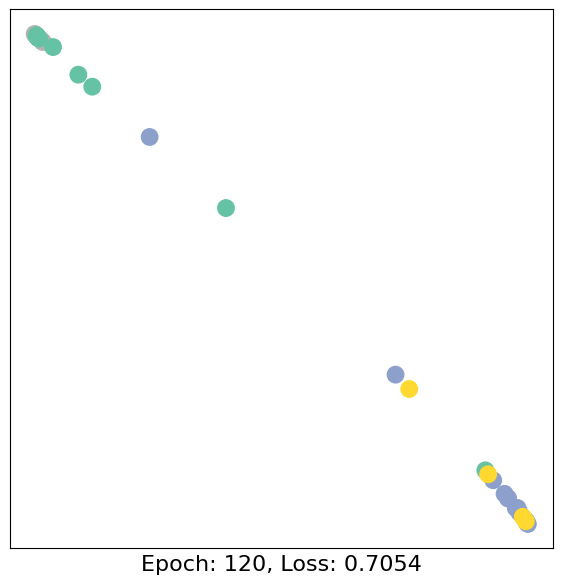

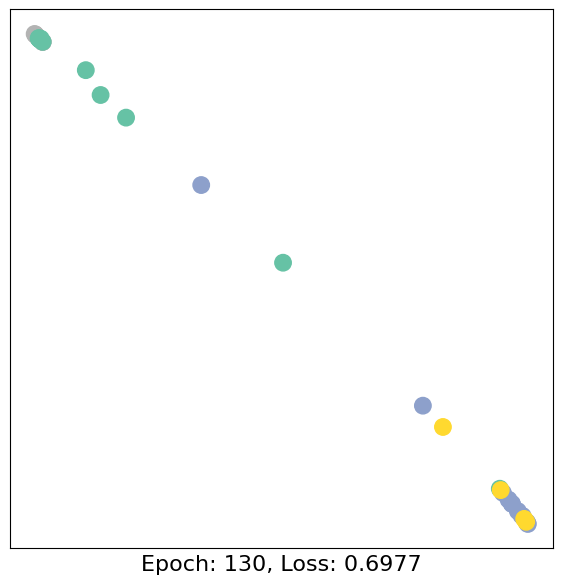

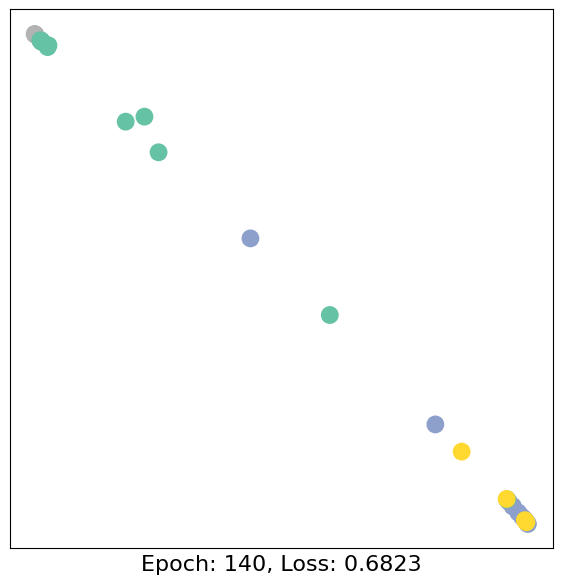

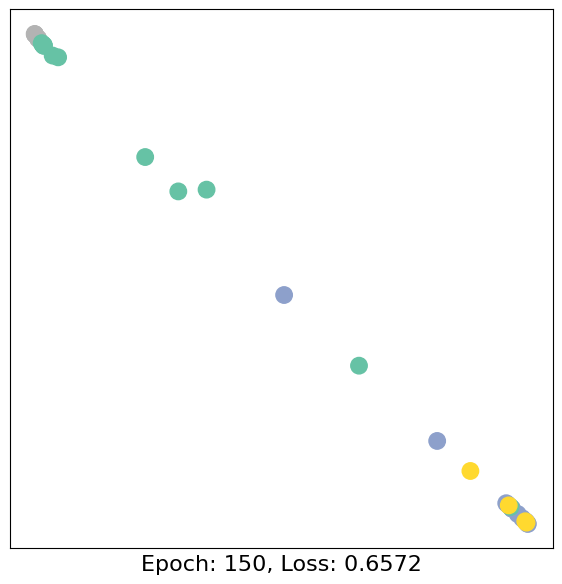

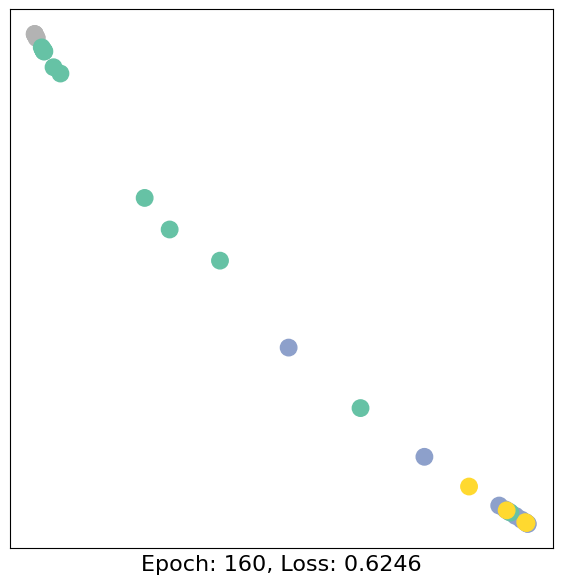

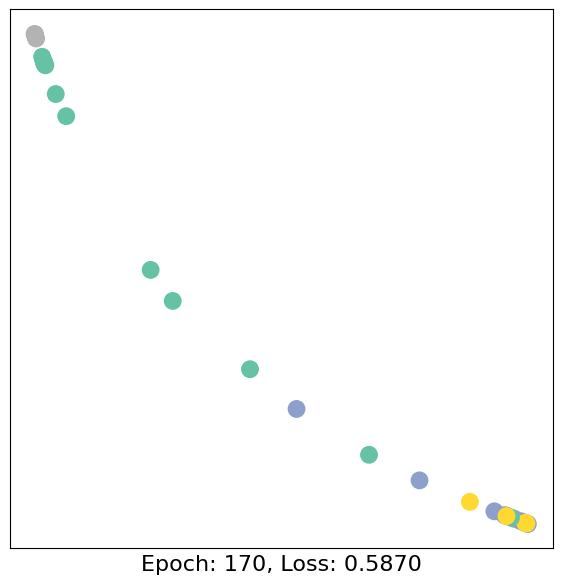

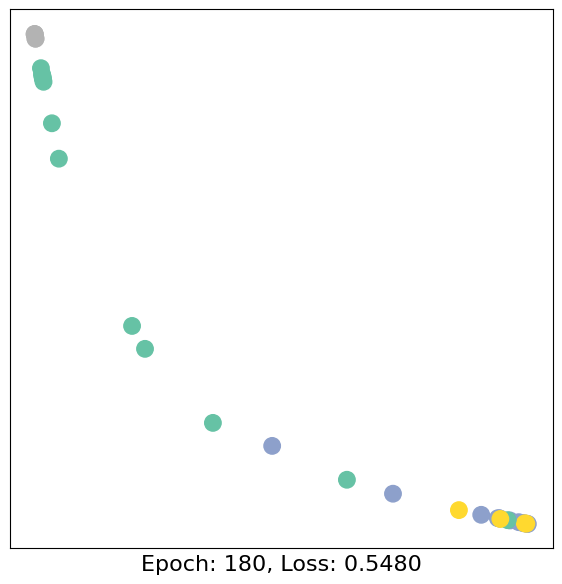

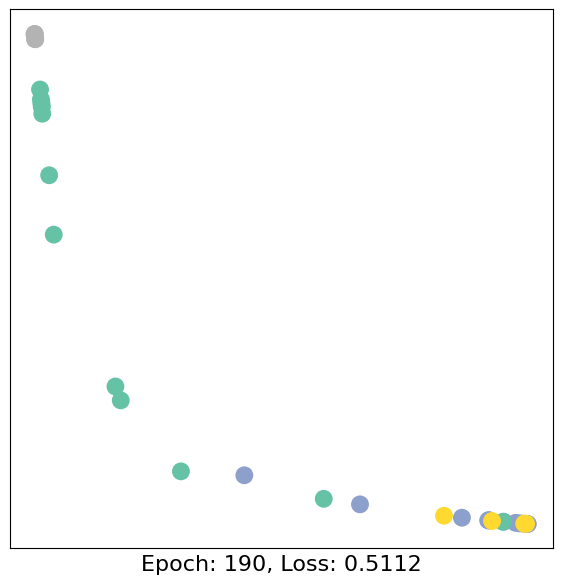

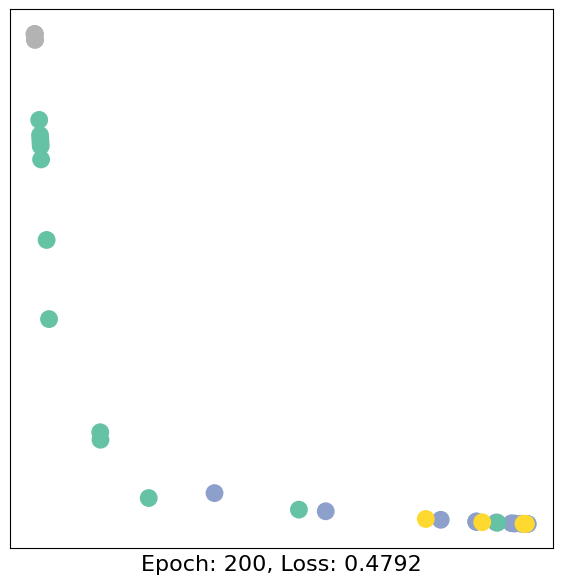

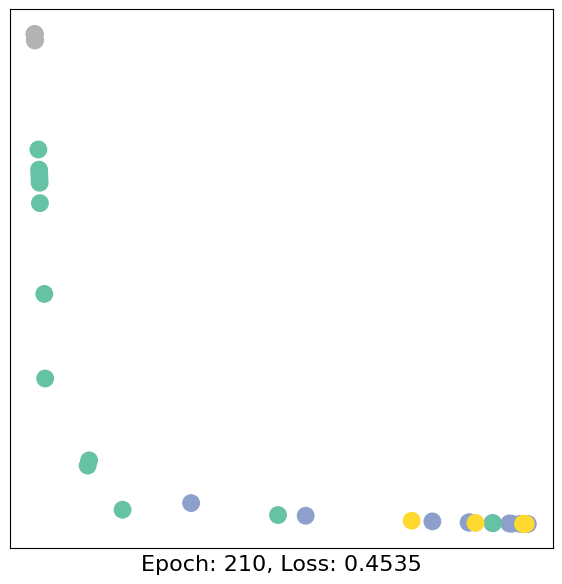

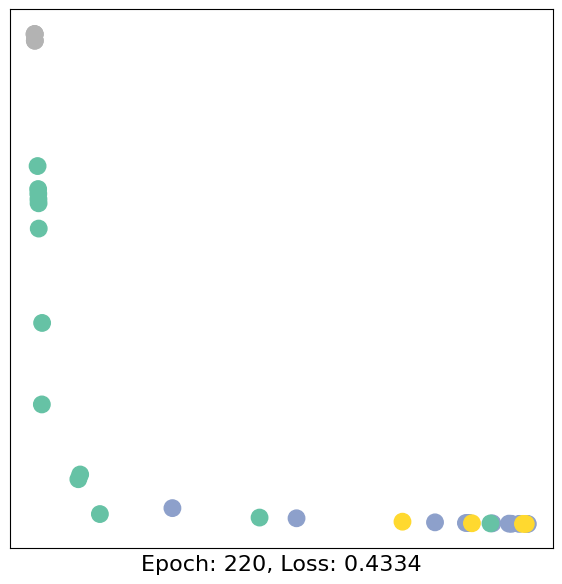

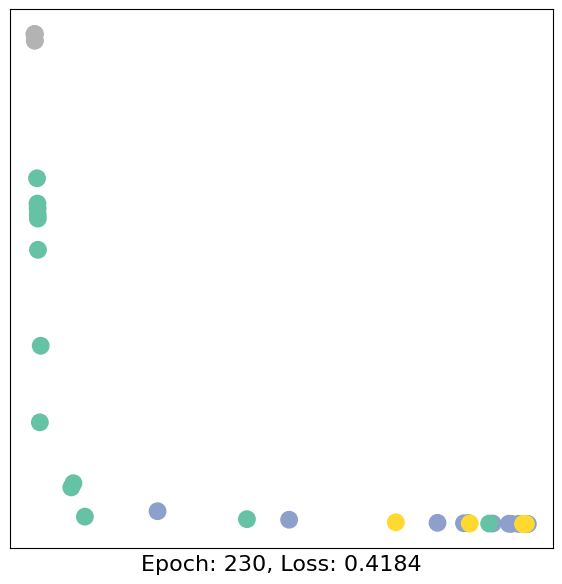

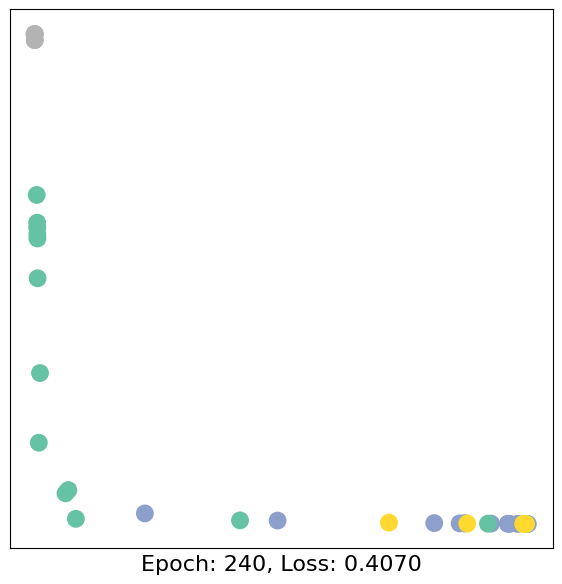

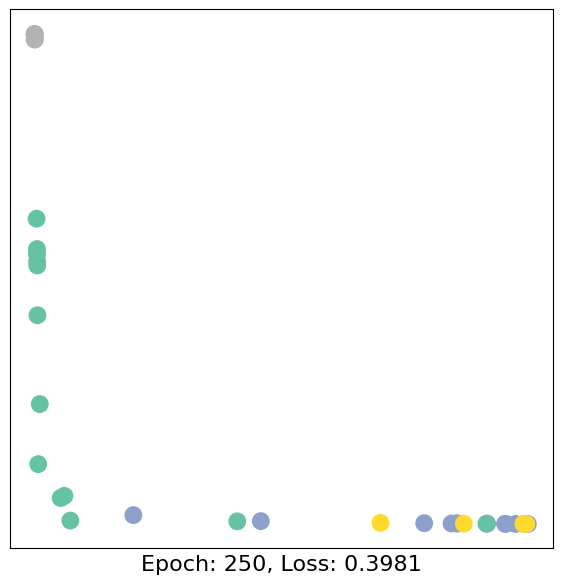

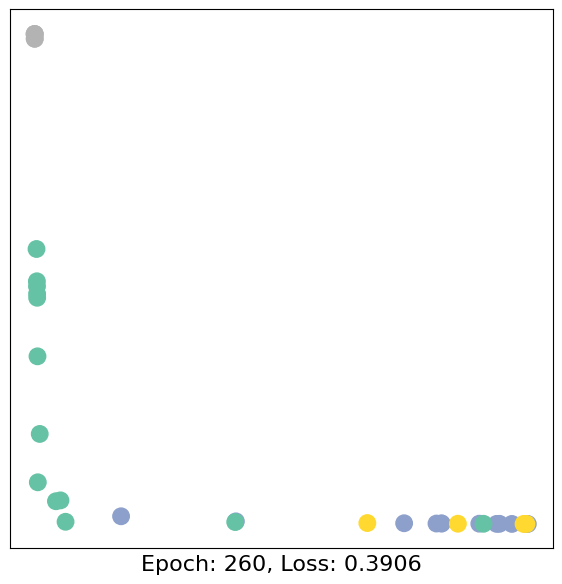

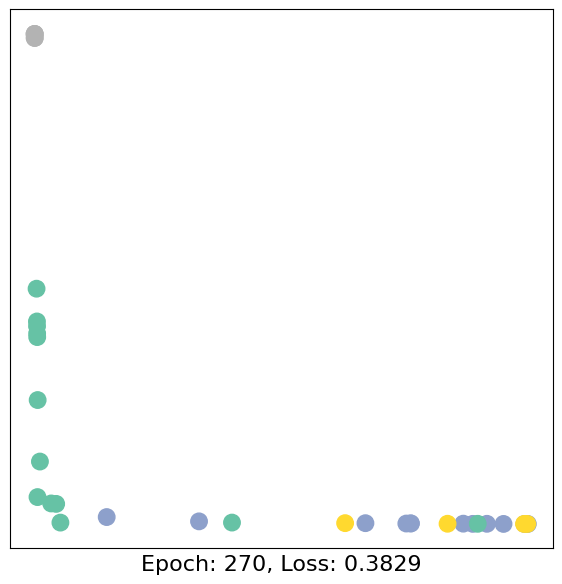

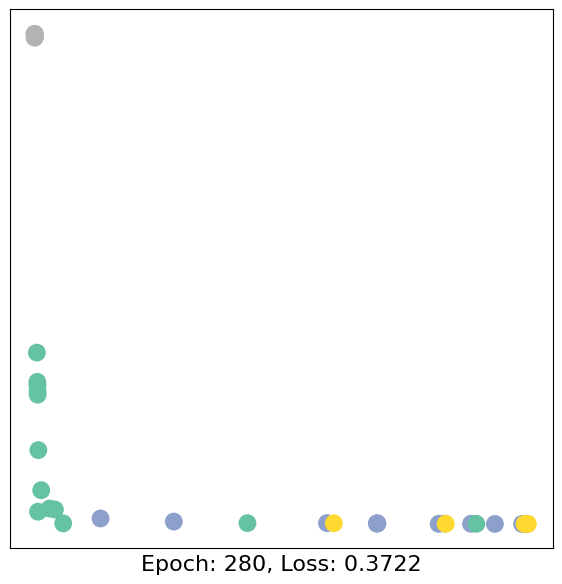

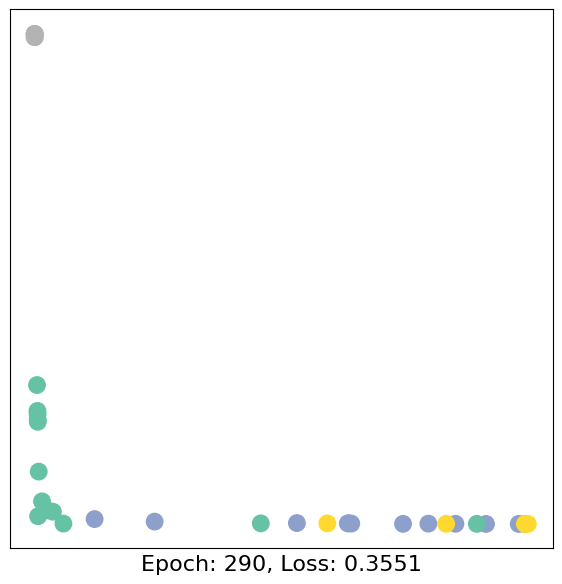

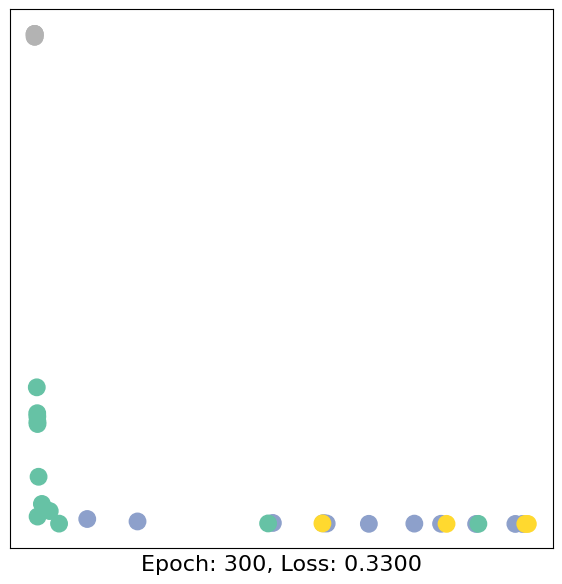

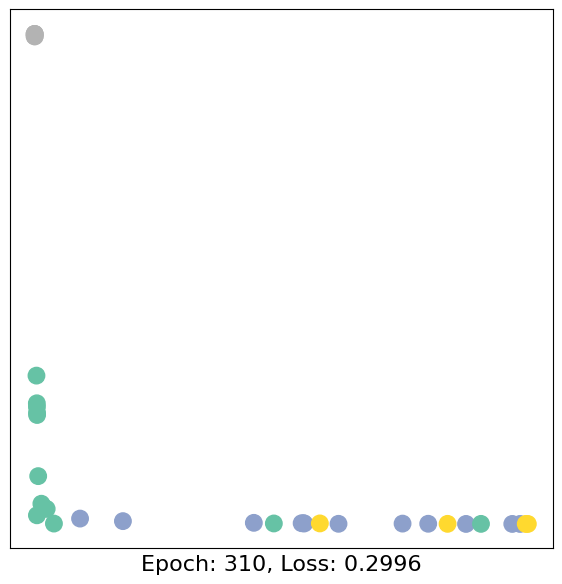

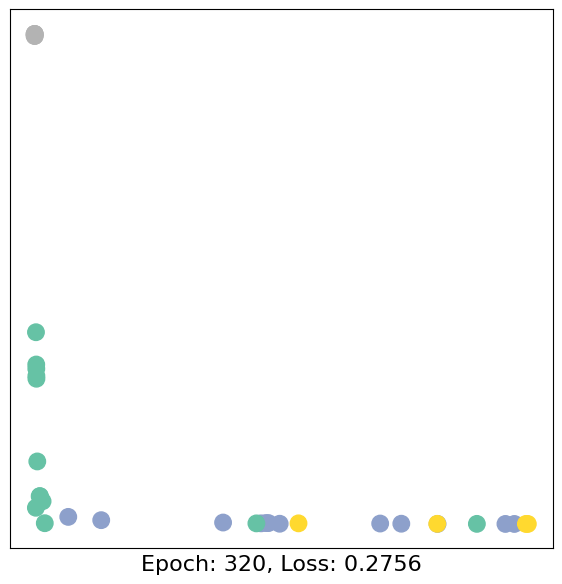

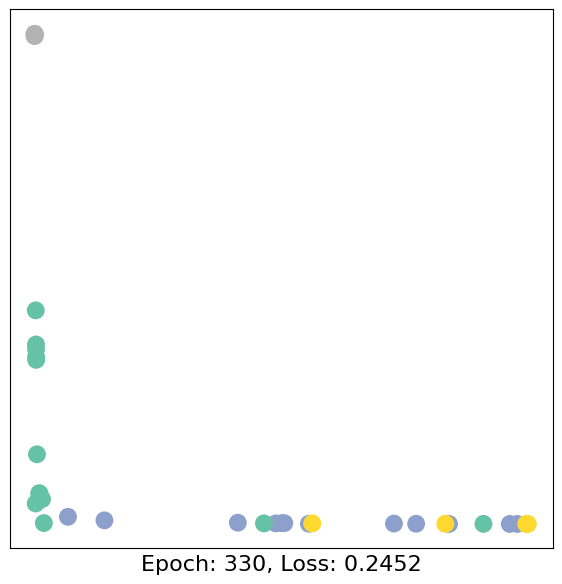

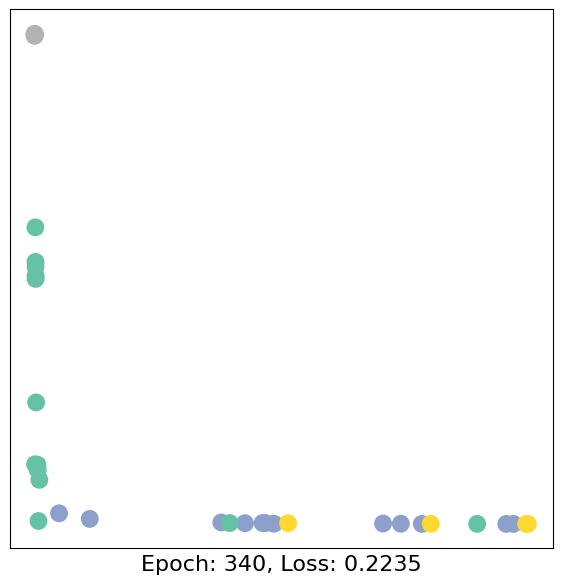

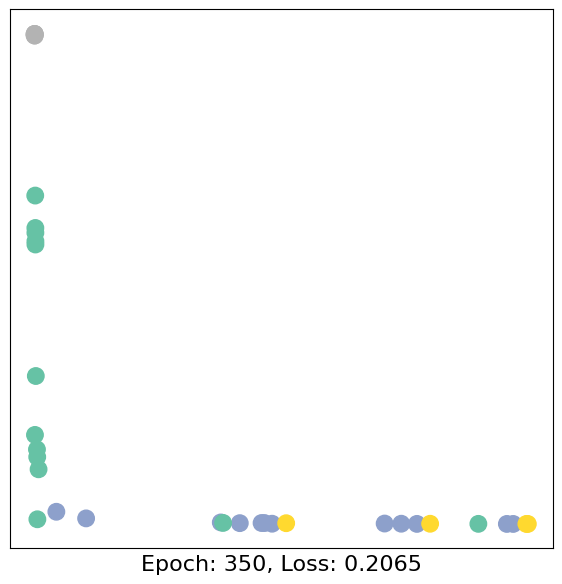

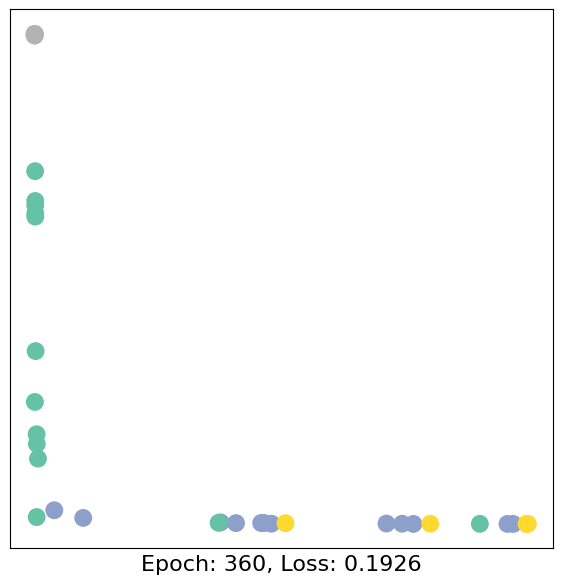

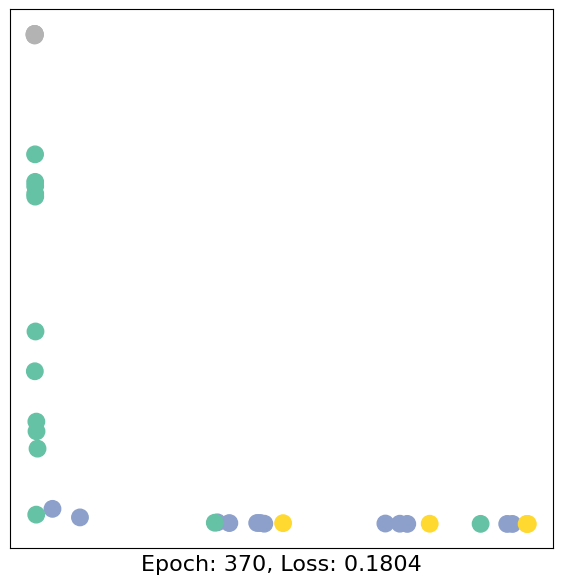

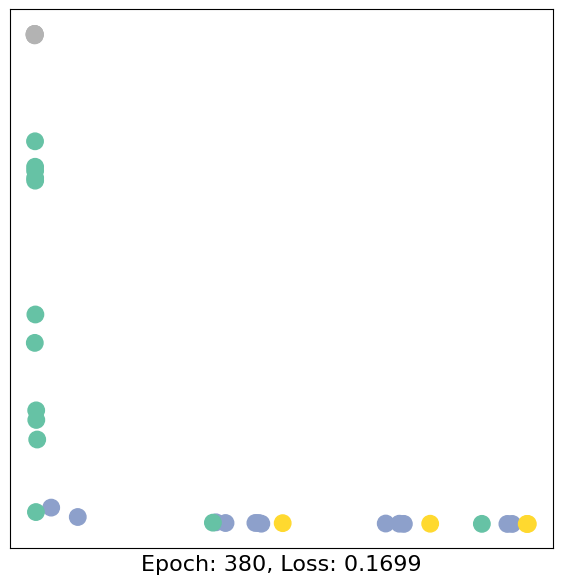

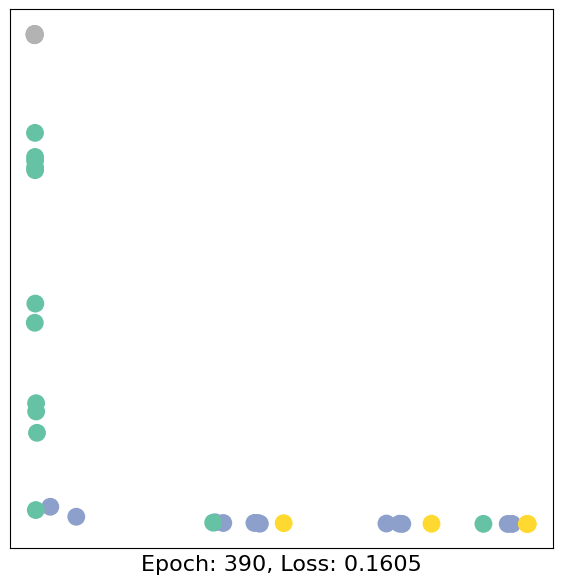

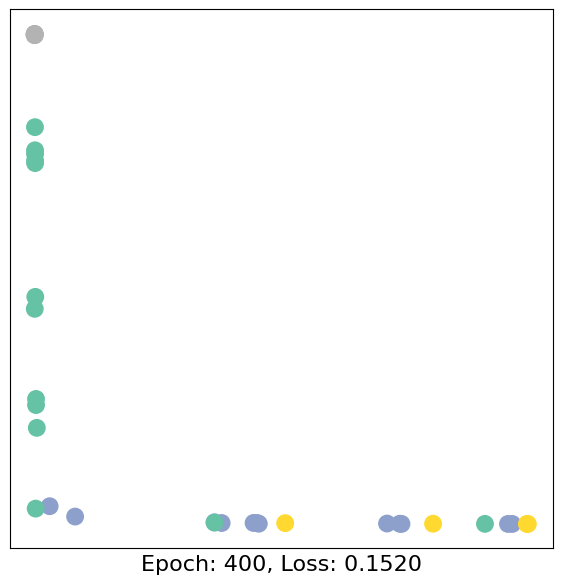

In [20]:
import time
from IPython.display import Javascript  # Restrict height of output cell.
display(Javascript('''google.colab.output.setIframeHeight(0, true, {maxHeight: 430})'''))

model = GCN()
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=0.01)  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

for epoch in range(401):
    loss, h = train(data)
    # Visualize the node embeddings every 10 epochs
    if epoch % 10 == 0:
        visualize(h, color=data.y, epoch=epoch, loss=loss)
        time.sleep(0.3)

As one can see, our 3-layer GCN model manages to linearly separating the communities and classifies most of the nodes correctly.Furthermore, we did this all with a few lines of code, thanks to the PyTorch Geometric library! 

Congratulations on completing your first Colab for XCS224W. Hopefully you now have a flavor of the assignments to come and an exposure to the rich functionalities of the libraries that we will use throughout the course!  


## Documentation



You can explore more PyG functions through its [documentation](https://pytorch-geometric.readthedocs.io/en/latest/).

## Building + Debugging Notes

Now that we have seen the basics of the PyG, and the tutorial was relative simple, fully reviewed and tested, let's see what we can do if things don't go as we expect.

Firstly, while working through future Colabs, to make sure you have enough GPU credits left for all assignments, we strongly encourage making sure that your notebook is using the CPU runtime during development and debugging. You can change the notebook runtime by selecting `Runtime` and then `Change runtime type`. From the dropdown, select `None` as the `hardware accelerator`. Once you have a full initial version and want to train the models, it is helpful to start by only running one epoch or even just a couple of batch iterations. This way you can check that the code fully executes and all your tensor shapes and logic match up, while also tracking expected behavior, such as a decreasing training loss. Remember to comment out / save the default number of epochs that we provide you.

While the hope is that everything goes right the first time around, usually things don't go quite as planned and we see ourselves burried in all kind of errors. To finish this tutorial, we explore how we could investigate and fix some of the errors that you may run into.

In the next cell, we have created a version of the above GCN model, with some straightforward and subtle issues in it.

In [22]:
import torch
from torch.nn import Linear, Sequential, Tanh
from torch_geometric.nn import GCNConv


class BuggyGCN(torch.nn.Module):
    def __init__(self, args, dataset):
        super(BuggyGCN, self).__init__()
        torch.manual_seed(12345)

        self.conv = Sequential(
            GCNConv(dataset.num_features, args.hidden_size),
            Tanh(),
            GCNConv(args.hidden_size, args.hidden_size),
            Tanh(),
            GCNConv(args.hidden_size, args.hidden_size)
        )

        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv(x, edge_index) # GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

Now, let's create the training arguments, pass them to the training code, and see what happens.

In [23]:
# Feel free to change the following parameters
args = {
    'device': torch.device('cuda' if torch.cuda.is_available() else 'cpu'),
    'hidden_size': 4,
    'epochs': 401,
    'lr': 0.01,
    'sleep': 0.2
}

In [24]:
from tqdm import tqdm
import time

model = BuggyGCN(args, dataset)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=args["lr"])  # Define optimizer.

def train(data):
    optimizer.zero_grad()  # Clear gradients.
    out, h = model(data.x, data.edge_index)  # Perform a single forward pass.
    loss = criterion(out[data.train_mask], data.y[data.train_mask])  # Compute the loss solely based on the training nodes.
    loss.backward()  # Derive gradients.
    optimizer.step()  # Update parameters based on gradients.
    return loss, h

with tqdm(range(args["epochs"]), unit="batch") as tepoch:
  for epoch in tepoch:  
      loss, h = train(data)
      tepoch.set_description(f'Epoch {epoch} - Loss {loss.item()}')
      time.sleep(args['sleep'])


AttributeError: 'dict' object has no attribute 'hidden_size'

You now should get the following error:

```
<ipython-input-76-22a7cac65169> in __init__(self, args, dataset)
     10 
     11         self.conv = Sequential(
---> 12             GCNConv(dataset.num_features, args.hidden_size),
     13             Tanh(),
     14             GCNConv(args.hidden_size, args.hidden_size),

AttributeError: 'dict' object has no attribute 'hidden_size'
```
As can be seen in the call stack, the issue seems to be with the `args` dictionary, and at first sight it does not seem to contain the `hidden_size` key. One way to check this would be to print the `args` variable before the error happens. Let's do that in the next cell. Execute the new model below and then again the training cell.

In [ ]:
import torch
from torch.nn import Linear, Sequential, Tanh
from torch_geometric.nn import GCNConv


class BuggyGCN(torch.nn.Module):
    def __init__(self, args, dataset):
        super(BuggyGCN, self).__init__()
        torch.manual_seed(12345)

        print(f'args: {args}')
        
        self.conv = Sequential(
            GCNConv(dataset.num_features, args.hidden_size),
            Tanh(),
            GCNConv(args.hidden_size, args.hidden_size),
            Tanh(),
            GCNConv(args.hidden_size, args.hidden_size)
        )

        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv(x, edge_index) # GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

In [ ]:
model = BuggyGCN(args, dataset)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=args["lr"])  # Define optimizer.

with tqdm(range(args["epochs"]), unit="batch") as tepoch:
  for epoch in tepoch:  
      loss, h = train(data)
      tepoch.set_description(f'Epoch {epoch} - Loss {loss.item()}')
      time.sleep(args['sleep'])

As can be seen in the output the `args` variable looks like this:

```
args: {'device': device(type='cpu'), 'hidden_size': 4, 'epochs': 401, 'lr': 0.01, 'sleep': 0.2}
```

so obviously it has the `hidden_size` key. How come then it's not working, considering that the `dataset.num_features` seems to work? Well, python is an untyped programming language and objects are not always the same type you expect. As `dataset` is an object of type ` torch_geometric.data.Dataset` containing the property `num_features`, `args` is a dictionary and unlike other programming languages, such as Javascript, accessing the keys with `.` doesn't work, unless you wrap it in a class end expose the keys as properties dynamically. 

Let's correct this issue and use the python way of accessing keys, i.e. `dict["key"]`. After updating the model we try  running the training loop again to see what happens next.

In [ ]:
import torch
from torch.nn import Linear, Sequential, Tanh
from torch_geometric.nn import GCNConv


class BuggyGCN(torch.nn.Module):
    def __init__(self, args, dataset):
        super(BuggyGCN, self).__init__()
        torch.manual_seed(12345)
        
        self.conv = Sequential(
            GCNConv(dataset.num_features, args["hidden_size"]),
            Tanh(),
            GCNConv(args["hidden_size"], args["hidden_size"]),
            Tanh(),
            GCNConv(args["hidden_size"], args["hidden_size"])
        )

        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):
        h = self.conv(x, edge_index) # GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

In [ ]:
model = BuggyGCN(args, dataset)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=args["lr"])  # Define optimizer.

with tqdm(range(args["epochs"]), unit="batch") as tepoch:
  for epoch in tepoch:  
      loss, h = train(data)
      tepoch.set_description(f'Epoch {epoch} - Loss {loss.item()}')
      time.sleep(args['sleep'])

Oh no, another error:

```
<ipython-input-83-8d1339d52472> in forward(self, x, edge_index)
     20 
     21     def forward(self, x, edge_index):
---> 22         h = self.conv(x, edge_index) # GNN embedding space.
     23 
     24         # Apply a final (linear) classifier.

TypeError: forward() takes 2 positional arguments but 3 were given
```

As can be seen in the call stack, the `self.conv.forward` method seems to expect just one parameter (the error takes the `self` reference also into account). So let's explore how we could get the definition of the `self.conv.forward` method and see what is happening. 

For this we introduce [The Python Debugger](https://docs.python.org/3/library/pdb.html), a powerful tool for debugging python programs. To do so, let's add the line `pdb.set_trace()` before the line causing the problem to stop the execution and be able to analyse the issue. The pdb window will open below the executing cell and we could execute some python code without breaking the execution thread. In order to get a function signature please execute the following lines one after each other in the pdb window, ending with the exit command:

```
import inspect
print(inspect.signature(self.conv.forward))
exit
```

In [ ]:
import torch
import pdb
from torch.nn import Linear, Sequential, Tanh
from torch_geometric.nn import GCNConv


class BuggyGCN(torch.nn.Module):
    def __init__(self, args, dataset):
        super(BuggyGCN, self).__init__()
        torch.manual_seed(12345)
        
        self.conv = Sequential(
            GCNConv(dataset.num_features, args["hidden_size"]),
            Tanh(),
            GCNConv(args["hidden_size"], args["hidden_size"]),
            Tanh(),
            GCNConv(args["hidden_size"], args["hidden_size"])
        )

        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):

        pdb.set_trace()
        
        h = self.conv(x, edge_index) # GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

In [ ]:
model = BuggyGCN(args, dataset)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=args["lr"])  # Define optimizer.

with tqdm(range(args["epochs"]), unit="batch") as tepoch:
  for epoch in tepoch:  
      loss, h = train(data)
      tepoch.set_description(f'Epoch {epoch} - Loss {loss.item()}')
      time.sleep(args['sleep'])

The pdb output should look like this:

```
-> h = self.conv(x, edge_index) # GNN embedding space.
(Pdb) import inspect
(Pdb) print(inspect.signature(self.conv.forward))
(input)
(Pdb) exit
```

We see that the `Sequence.forward` method accepts just one parameter, `input`, exposing a limitation of the `Sequence` class when being used with modules that expect more than one parameter in their `forward` method. Since the `GCNConv` is a PyG module, we cannot change it, so let's get rid of the `Sequence` and use `ModuleList` instead. Execute the next cells, containaing the updated definition of the model. 

In [ ]:
import torch
import pdb
from torch.nn import Linear, Sequential, Tanh, ModuleList
from torch_geometric.nn import GCNConv


class BuggyGCN(torch.nn.Module):
    def __init__(self, args, dataset):
        super(BuggyGCN, self).__init__()
        torch.manual_seed(12345)
        
        self.convs = ModuleList([
            GCNConv(dataset.num_features, args["hidden_size"]),
            GCNConv(args["hidden_size"], args["hidden_size"]),
            GCNConv(args["hidden_size"], args["hidden_size"])
        ])

        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):

        h = x
        for i in range(len(self.convs)):
          h = self.convs[i](h, edge_index)
          h = h.tanh()

        # h = GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

In [ ]:
model = BuggyGCN(args, dataset)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=args["lr"])  # Define optimizer.

with tqdm(range(args["epochs"]), unit="batch") as tepoch:
  for epoch in tepoch:  
      loss, h = train(data)
      tepoch.set_description(f'Epoch {epoch} - Loss {loss.item()}')
      time.sleep(args['sleep'])

Not again, another error. When does it stop? Fortunately, this is the last error we built-in. So the error now looks like this:

```
<ipython-input-92-7a05cd42a108> in forward(self, x, edge_index)
     28 
     29         # Apply a final (linear) classifier.
---> 30         out = self.classifier(h)
     31 
     32         return out, h

RuntimeError: mat1 and mat2 shapes cannot be multiplied (34x4 and 2x4)
```

This is a matrix multiplication shape error, an error you will likely run into many time. Let's see how we can investigate this in Google Colab. We know that we could use `print` but that makes our code a bit messy and we also have seen `pdb` in action, so let's use it again to break the execution before the line presented in the call stack. With the exection stopped, we can inspect global and local variables two different ways. Firstly, we can use the Google Colab Variables window, which can be found on the left side bar as $\{x\}$, above the folder icon. Using `pdb` we can also print variable information using `print(var.info)`.

Execute the following cell containing the modifed model and then the training loop. After executution stops, first use the Variable window to inspect the dimensions of the matrix `h`. Then, using pdb, confirm `h`'s dimension and print the definition of the `self.classifier` layer:

```
p h.shape
p self.classifier
exit
```

In [ ]:
import torch
import pdb
from torch.nn import Linear, Sequential, Tanh, ModuleList
from torch_geometric.nn import GCNConv


class BuggyGCN(torch.nn.Module):
    def __init__(self, args, dataset):
        super(BuggyGCN, self).__init__()
        torch.manual_seed(12345)
        
        self.convs = ModuleList([
            GCNConv(dataset.num_features, args["hidden_size"]),
            GCNConv(args["hidden_size"], args["hidden_size"]),
            GCNConv(args["hidden_size"], args["hidden_size"])
        ])

        self.classifier = Linear(2, dataset.num_classes)

    def forward(self, x, edge_index):

        h = x
        for i in range(len(self.convs)):
          h = self.convs[i](h, edge_index)
          h = h.tanh()

        # h = GNN embedding space.
        
        pdb.set_trace()
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

In [ ]:
model = BuggyGCN(args, dataset)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=args["lr"])  # Define optimizer.

with tqdm(range(args["epochs"]), unit="batch") as tepoch:
  for epoch in tepoch:  
      loss, h = train(data)
      tepoch.set_description(f'Epoch {epoch} - Loss {loss.item()}')
      time.sleep(args['sleep'])

The dimension of the `h` variable should be, when using the default values given in the `args` dictionary, `(34, 4)` and the output of the `pdb` window is:

```
-> out = self.classifier(h)
(Pdb) p h.shape
torch.Size([34, 4])
(Pdb) p self.classifier
Linear(in_features=2, out_features=4, bias=True)
exit
```

From this we see that `self.classifier` expects two features, i.e. the input dimension should be `(N, 2)`, but we are passing a dimension of `(N, 4)`. 

Once we fix this issue, we will finally arrive at a bug free model. Execute the next cell to generate the bug free definition of the model and, finally, execute the training cell one last time!

In [ ]:
import torch
import pdb
from torch.nn import Linear, Sequential, Tanh, ModuleList
from torch_geometric.nn import GCNConv


class BuggyGCN(torch.nn.Module):
    def __init__(self, args, dataset):
        super(BuggyGCN, self).__init__()
        torch.manual_seed(12345)
        
        self.convs = ModuleList([
            GCNConv(dataset.num_features, args["hidden_size"]),
            GCNConv(args["hidden_size"], args["hidden_size"]),
            GCNConv(args["hidden_size"], args["hidden_size"])
        ])

        self.classifier = Linear(args["hidden_size"], dataset.num_classes)

    def forward(self, x, edge_index):

        h = x
        for i in range(len(self.convs)):
          h = self.convs[i](h, edge_index)
          h = h.tanh()

        # h = GNN embedding space.
        
        # Apply a final (linear) classifier.
        out = self.classifier(h)

        return out, h

In [ ]:
model = BuggyGCN(args, dataset)
criterion = torch.nn.CrossEntropyLoss()  # Define loss criterion.
optimizer = torch.optim.Adam(model.parameters(), lr=args["lr"])  # Define optimizer.

with tqdm(range(args["epochs"]), unit="batch") as tepoch:
  for epoch in tepoch:  
      loss, h = train(data)
      tepoch.set_description(f'Epoch {epoch} - Loss {loss.item()}')
      time.sleep(args['sleep'])

There shouldn't be any errors appearing and the loss should decrease with every epoch. 

Congratulations on finishing this tutorial and good luck with the class!